## Kaggle Username : amanyabdelhamid11
## Name : Amany Abdelhamid Abdelrahman Taha
## ID : 1300308
## BN : 43733


### This assignment built from scratch for bonus.
### The accuracy got from kaggle for my_submission was 76.555% (reasonable).
### Naiive Bayes Rules implemented on two features (Sex , Pclass) with the mentioned accuracy.

In [1]:
import pandas as pd

In [2]:
#read train data file
data_train = pd.read_csv("train.csv")

In [3]:
data_train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#drop cabin and ticket because they have many missing values 
data_train = data_train.drop(['Ticket','Cabin'], axis=1)
# Remove NaN values 
data_train = data_train.dropna()


In [5]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,S


In [6]:
#Count number of survived and unsurvived and total passengers
total_count = data_train.Survived.value_counts()
survived_count = total_count[1]
unsurvived_count = total_count[0]
total = survived_count + unsurvived_count
print("survived: " , survived_count,"   unsurvived: ",unsurvived_count,"   total: ",total)


survived:  288    unsurvived:  424    total:  712


In [7]:
#Count number of passengers with first , second and third class
pclass_count = data_train.Pclass.value_counts()
first_count = pclass_count[1]
second_count = pclass_count[2]
third_count = pclass_count[3]
print("first " , first_count,"   second: ",second_count,"   third: ",third_count)

first  184    second:  173    third:  355


In [8]:
#Count number of males and females
sex_count = data_train.Sex.value_counts()
print(sex_count)
male_count = sex_count['male']
female_count = sex_count['female']
print("male " ,male_count,"   female: ",female_count)

male      453
female    259
Name: Sex, dtype: int64
male  453    female:  259


In [9]:
#priors : let (survived = yes & unsurvived = no)  for simplicity
prob_yes = survived_count / total
print("P(yes): ",prob_yes)
prob_no = unsurvived_count / total
print("P(no): ",prob_no)

P(yes):  0.404494382022
P(no):  0.595505617978


In [10]:
#conditional probabilities of first class : let (survived = yes & unsurvived = no)  for simplicity
first_pclass_intersect_yes_count = data_train.Pclass[data_train.Survived == 1][data_train.Pclass == 1].value_counts()
print(first_pclass_intersect_yes_count[1])
prob_first_pclass_given_yes =  first_pclass_intersect_yes_count[1]/survived_count
print("P(Pclass = 1 | yes): ",prob_first_pclass_given_yes)

first_pclass_intersect_no_count = data_train.Pclass[data_train.Survived == 0][data_train.Pclass == 1].value_counts()
print(first_pclass_intersect_no_count[1])
prob_first_pclass_given_no =  first_pclass_intersect_no_count[1]/unsurvived_count
print("P(Pclass = 1 | no): ",prob_first_pclass_given_no)

120
P(Pclass = 1 | yes):  0.416666666667
64
P(Pclass = 1 | no):  0.150943396226


In [11]:
#conditional probabilities of second class : let (survived = yes & unsurvived = no)  for simplicity
second_pclass_intersect_yes_count = data_train.Pclass[data_train.Survived == 1][data_train.Pclass == 2].value_counts()
print(second_pclass_intersect_yes_count[2])
prob_second_pclass_given_yes =  second_pclass_intersect_yes_count[2]/survived_count
print("P(Pclass = 2 | yes): ",prob_second_pclass_given_yes)

second_pclass_intersect_no_count = data_train.Pclass[data_train.Survived == 0][data_train.Pclass == 2].value_counts()
print(second_pclass_intersect_no_count[2])
prob_second_pclass_given_no =  second_pclass_intersect_no_count[2]/unsurvived_count
print("P(Pclass = 2 | no): ",prob_second_pclass_given_no)

83
P(Pclass = 2 | yes):  0.288194444444
90
P(Pclass = 2 | no):  0.212264150943


In [12]:
#conditional probabilities of third class : let (survived = yes & unsurvived = no)  for simplicity
third_pclass_intersect_yes_count = data_train.Pclass[data_train.Survived == 1][data_train.Pclass == 3].value_counts()
print(third_pclass_intersect_yes_count[3])
prob_third_pclass_given_yes =  third_pclass_intersect_yes_count[3]/survived_count
print("P(Pclass = 3 | yes): ",prob_third_pclass_given_yes)

third_pclass_intersect_no_count = data_train.Pclass[data_train.Survived == 0][data_train.Pclass == 3].value_counts()
print(third_pclass_intersect_no_count[3])
prob_third_pclass_given_no =  third_pclass_intersect_no_count[3]/unsurvived_count
print("P(Pclass = 3 | no): ",prob_third_pclass_given_no)

85
P(Pclass = 3 | yes):  0.295138888889
270
P(Pclass = 3 | no):  0.63679245283


In [13]:
#conditional probabilities of female : let (survived = yes & unsurvived = no)  for simplicity
female_intersect_yes_count = data_train.Sex[data_train.Survived == 1][data_train.Sex == 'female'].value_counts()
print(female_intersect_yes_count['female'])
prob_female_given_yes = female_intersect_yes_count['female']/survived_count
print("P(Sex = female | yes): ",prob_female_given_yes)

female_intersect_no_count = data_train.Sex[data_train.Survived == 0][data_train.Sex == 'female'].value_counts()
print(female_intersect_no_count['female'])
prob_female_given_no =  female_intersect_no_count['female']/unsurvived_count
print("P(Sex = 'female | no): ",prob_female_given_no)

195
P(Sex = female | yes):  0.677083333333
64
P(Sex = 'female | no):  0.150943396226


In [14]:
#conditional probabilities of male : let (survived = yes & unsurvived = no)  for simplicity
male_intersect_yes_count = data_train.Sex[data_train.Survived == 1][data_train.Sex == 'male'].value_counts()
print(male_intersect_yes_count['male'])
prob_male_given_yes = male_intersect_yes_count['male']/survived_count
print("P(Sex = male | yes): ",prob_male_given_yes)

male_intersect_no_count = data_train.Sex[data_train.Survived == 0][data_train.Sex == 'male'].value_counts()
print(male_intersect_no_count['male'])
prob_male_given_no =  male_intersect_no_count['male']/unsurvived_count
print("P(Sex = 'male | no): ",prob_male_given_no)

93
P(Sex = male | yes):  0.322916666667
360
P(Sex = 'male | no):  0.849056603774


In [15]:
#read test data file
data_test = pd.read_csv("test.csv")

In [16]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [17]:
#Count number of test data
test_cases_count = data_test.Sex.value_counts()
test_cases_total = test_cases_count['male']+test_cases_count['female']
print(test_cases_total)

418


In [18]:
#predict test data according to gender and pclass
survived_predict = []
for i in range(892,1310):
    Sex_value = data_test.Sex[data_test.PassengerId == i]
    Pclass_value = data_test.Pclass[data_test.PassengerId == i]
    Sex_ = Sex_value[i-892]
    Pclass_ = Pclass_value[i-892]
    
    #likelihood of yes
    if (Sex_ == 'male' and Pclass_ == 1):
        L_yes = prob_yes * prob_first_pclass_given_yes * prob_male_given_yes
    elif  Sex_ == 'male' and Pclass_ == 2:
         L_yes = prob_yes * prob_second_pclass_given_yes * prob_male_given_yes
    elif  Sex_ == 'male' and Pclass_ == 3:
         L_yes = prob_yes * prob_third_pclass_given_yes * prob_male_given_yes
    elif   Sex_ == 'female' and Pclass_ == 1:
        L_yes = prob_yes * prob_first_pclass_given_yes * prob_female_given_yes
    elif   Sex_ == 'female' and Pclass_ == 2:
        L_yes = prob_yes * prob_second_pclass_given_yes * prob_female_given_yes
    elif   Sex_ == 'female' and Pclass_ == 3:
        L_yes = prob_yes * prob_third_pclass_given_yes * prob_female_given_yes
        
    #liklihood of no
    if Sex_ == 'male' and Pclass_ == 1:
        L_no = prob_no * prob_first_pclass_given_no * prob_male_given_no
    elif  Sex_ == 'male' and Pclass_ == 2:
         L_no = prob_no * prob_second_pclass_given_no * prob_male_given_no
    elif  Sex_ == 'male' and Pclass_ == 3:
         L_no = prob_no * prob_third_pclass_given_no * prob_male_given_no
    elif   Sex_ == 'female' and Pclass_ == 1:
        L_no = prob_no * prob_first_pclass_given_no * prob_female_given_no
    elif   Sex_ == 'female' and Pclass_ == 2:
        L_no = prob_no * prob_second_pclass_given_no * prob_female_given_no
    elif   Sex_ == 'female' and Pclass_ == 3:
        L_no = prob_no * prob_third_pclass_given_no * prob_female_given_no 
        
    #predict
    if L_yes >= L_no:
        survived_predict.append(1)
    else :
        survived_predict.append(0)
     


In [19]:
print(survived_predict)

[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 

In [20]:
#construct passengerId dataframe to write it in output file
PassengerId = []
for i in range(0,test_cases_total):
    PassengerId.append(i + 892)      # 892 is the first Id in test data 
    
#construct dataframe of two columns     
file_out = {'PassengerId':PassengerId, 'Survived':survived_predict}    
df = pd.DataFrame(file_out, columns = ['PassengerId', 'Survived']) 

#save dataframe of the data in csv file
df.to_csv('my_submission.csv',index=False)    

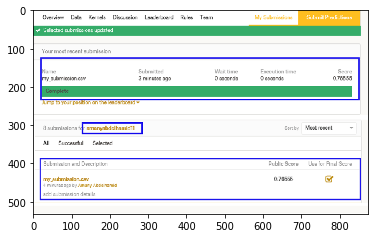

In [21]:
import cv2
from matplotlib import pyplot as plt

kaggle = cv2.imread('kaggle_screenshot.png',1)

plt.imshow(kaggle)
plt.show()

                                              Thank You